## 支持向量機

In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [7]:
X = iris.data[0:100,2:4]

In [8]:
y = iris.target[0:100]

In [11]:
from sklearn.svm import SVC
#?SVC
clf1 = SVC(kernel="linear")
clf1.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()
clf2.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
def plot_estimator(estimator, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = estimator.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.plot()
    plt.contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
    plt.xlabel('Petal.Length')
    plt.ylabel('Petal.Width')
    plt.show()


Populating the interactive namespace from numpy and matplotlib


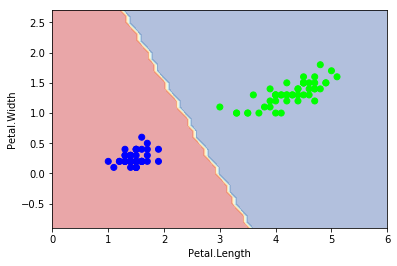

In [17]:
% pylab inline
import numpy as np
from matplotlib import pyplot as plt
plot_estimator(clf1, X,y)

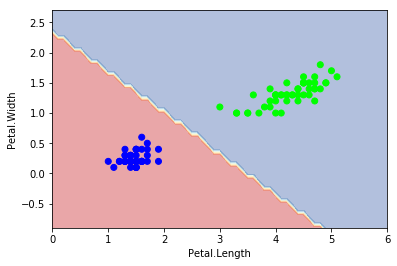

In [18]:
plot_estimator(clf2, X,y)

### 決定正則項 C

In [19]:
data = np.array([[-1,2,0],[-2,3,0],[-2,5,0],[-3,-4,0],[-0.1,2,0],[0.2,1,1],[0,1,1],[1,2,1], [1,1,1], [-
0.4,0.5,1],[2,5,1]])

In [20]:
X = data[:, :2]
Y = data[:,2]


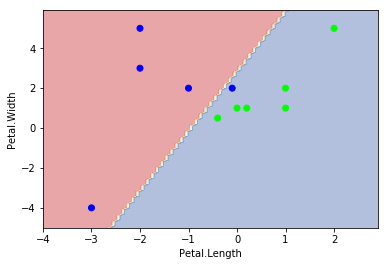

In [21]:
clf = SVC(C=1.0, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)


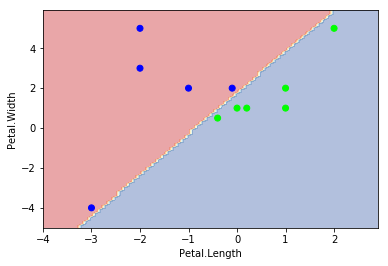

In [22]:
clf = SVC(C=10000.0, kernel='linear')
clf.fit(X, Y)
plot_estimator(clf,X,Y)

### 比較不同 Kernel

In [25]:
X = iris.data[0:100,2:4]
y = iris.target[0:100]

In [27]:
clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = SVC(kernel="poly")
clf2.fit(X, y)

clf3 = SVC(kernel="linear")
clf3.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

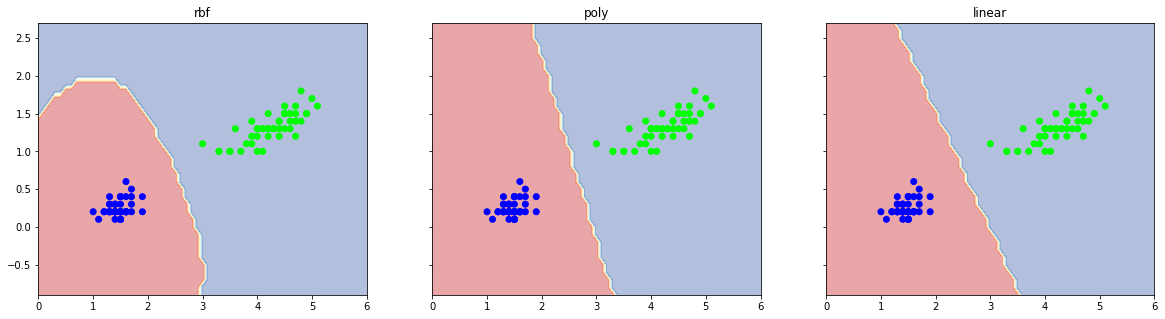

In [30]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))

for idx, clf, title in zip([0,1,2],[clf1, clf2, clf3], ['rbf', 'poly', 'linear']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
    axarr[idx].set_title(title)  

In [29]:
a = ['rbf', 'poly', 'linear']
b = [1    ,      2,        3]
for rec in zip(a,b):
    print(rec)

for i, j in zip(a,b):
    print(i,j)

('rbf', 1)
('poly', 2)
('linear', 3)
rbf 1
poly 2
linear 3


In [31]:
X = iris.data[:,[2,3]]
y = iris.target

In [32]:
clf1 = SVC(kernel="rbf")
clf1.fit(X, y)

clf2 = SVC(kernel="poly")
clf2.fit(X, y)

clf3 = SVC(kernel="linear")
clf3.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

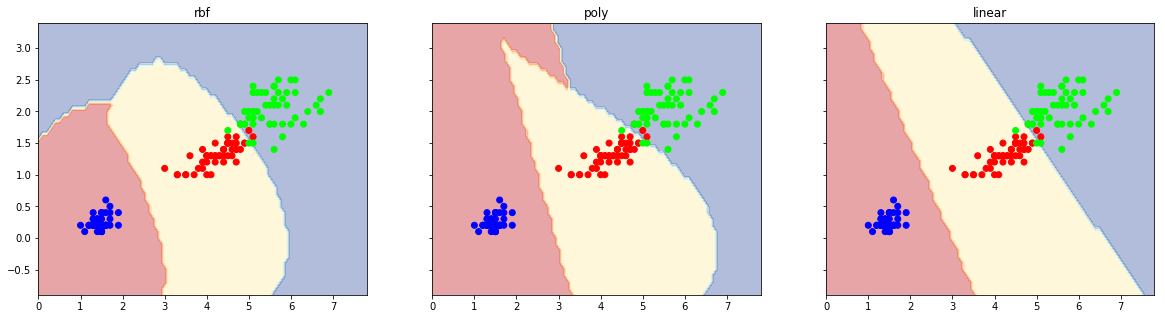

In [33]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

f, axarr = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(20, 5))

for idx, clf, title in zip([0,1,2],[clf1, clf2, clf3], ['rbf', 'poly', 'linear']):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.4, cmap = plt.cm.RdYlBu)
    axarr[idx].scatter(X[:, 0], X[:, 1], c=y, cmap = plt.cm.brg)
    axarr[idx].set_title(title)  

## 簡單語音助理

In [34]:
! pip install SpeechRecognition

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [36]:
! pip install pyaudio

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [38]:
import speech_recognition
r = speech_recognition.Recognizer()

with speech_recognition.Microphone() as source:
    r.adjust_for_ambient_noise(source)
    audio = r.listen(source)
    
r.recognize_google(audio, language='zh-TW')

'大家好中午我想吃飯'

In [39]:
qa = {
 '早安': '安安',
 '午安': '吃午飯沒',
 '再見': '掰掰',
    
}

In [40]:
import speech_recognition

def listenTo():
    r = speech_recognition.Recognizer()

    with speech_recognition.Microphone() as source:
        r.adjust_for_ambient_noise(source)
        audio = r.listen(source)

    return r.recognize_google(audio, language='zh-TW')

In [41]:
qa.get(listenTo(), '我現在還不聰明 等我變聰明以後再回答你')

'吃午飯沒'

In [42]:
!pip install gTTS

  Running setup.py bdist_wheel for gTTS: started
  Running setup.py bdist_wheel for gTTS: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\ac\d3\52\db6c154b20dfaab7e0b514eb5eef92cecd057e40e16fdda58b
  Running setup.py bdist_wheel for bs4: started
  Running setup.py bdist_wheel for bs4: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\a0\b0\b2\4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
  Running setup.py bdist_wheel for gtts-token: started
  Running setup.py bdist_wheel for gtts-token: finished with status 'done'
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\dd\11\61\33f7e51bf545e910552b2255eead2a7cd8ef54064b46dceb34
Successfully built gTTS bs4 gtts-token


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [43]:
! pip install pygame

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [46]:
from gtts import gTTS
from pygame import mixer

mixer.init()

import tempfile
def speak(sentence):
    with tempfile.NamedTemporaryFile(delete=False) as fp:
        tts = gTTS(text=sentence, lang='zh-tw')
        tts.save("{}.mp3".format(fp.name))
        mixer.music.load('{}.mp3'.format(fp.name))
        mixer.music.play()
        
speak('九四八七九四狂')

In [ ]:
speak(qa.get(listenTo(), '我現在還不聰明 等我變聰明以後再回答你'))

## NLU
- http://www.crownpku.com/2017/07/27/%E7%94%A8Rasa_NLU%E6%9E%84%E5%BB%BA%E8%87%AA%E5%B7%B1%E7%9A%84%E4%B8%AD%E6%96%87NLU%E7%B3%BB%E7%BB%9F.html
- https://rasa.com/docs/nlu/